In [ ]:
import numpy as np
import matplotlib.pyplot as plt

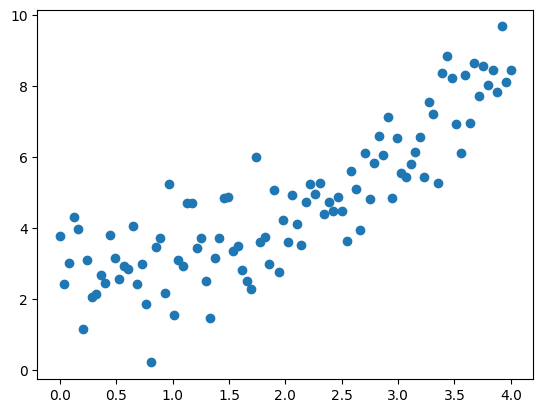

In [ ]:
np.random.seed(0)

m = 100
X = np.linspace(0, 4, m).reshape(m, 1)
y = 2+ X**1.3 + np.random.randn(m,1)

plt.scatter(X, y)

In [ ]:
from sklearn.linear_model import LinearRegression

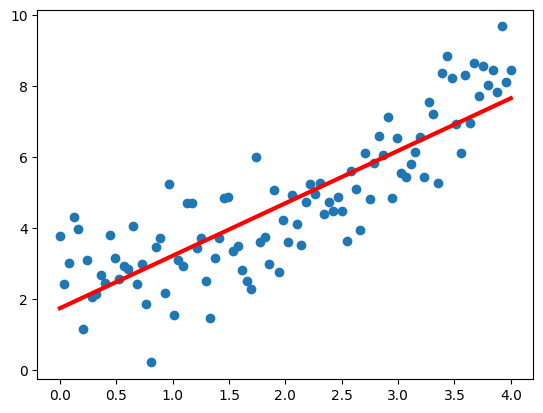

In [ ]:
model = LinearRegression()

model.fit(X, y)
predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c='r', lw=3)

In [ ]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, predictions)

0.8739397321740953

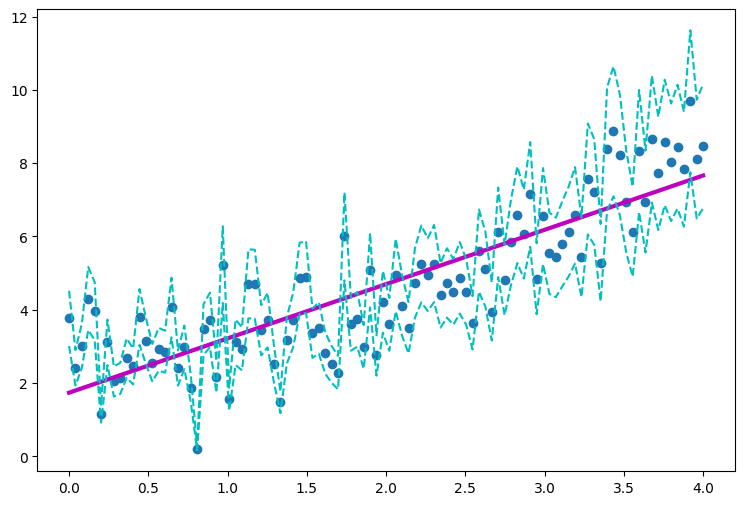

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, predictions, c='m', lw=3)
plt.plot(X, y + y*0.2, c='c', ls='--')
plt.plot(X, y - y*0.2, c='c', ls='--')

In [ ]:
def custom_metric(y, y_pred):
  return np.sum((y_pred < y + y*0.2) & (y_pred > y - y*0.2))/y.size

In [ ]:
custom_metric(y, predictions)

0.63

In [ ]:
from sklearn.metrics import make_scorer

In [ ]:
custom_score = make_scorer(custom_metric, greater_is_better=True)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring=custom_score)

array([0.08823529, 0.42424242, 0.3030303 ])

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

In [ ]:
model = SVR(kernel='rbf', degree=3)
params = {'gamma' : np.arange(0.1, 1, 0.05)}

grid = GridSearchCV(model, param_grid=params, cv=3, scoring=custom_score)
grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring=make_scorer(custom_metric))

In [ ]:
best_model = grid.best_estimator_

In [ ]:
pred_final = best_model.predict(X).reshape(100, 1)

custom_metric(y, pred_final)

0.64

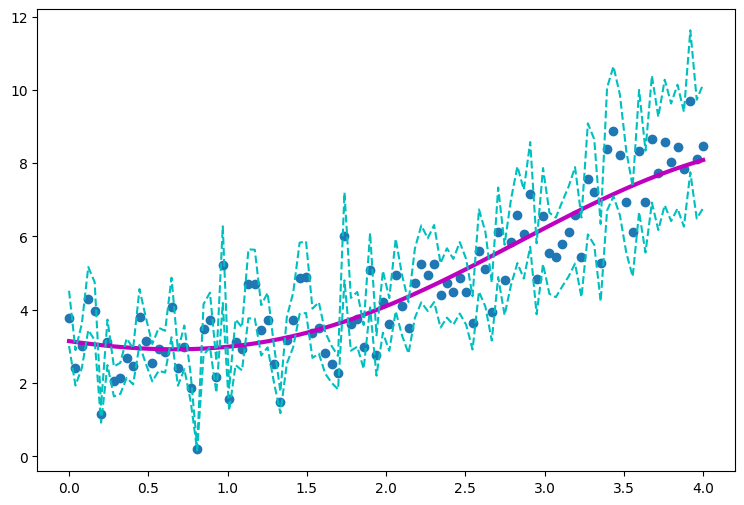

In [ ]:
plt.figure(figsize=(9, 6))
plt.scatter(X, y)
plt.plot(X, pred_final, c='m', lw=3)
plt.plot(X, y + y*0.2, c='c', ls='--')
plt.plot(X, y - y*0.2, c='c', ls='--')